In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data

df = pd.read_csv('bank_churn_clean.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bankDesc = []

for i in df.columns:
    bankDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = bankDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,CreditScore,int64,0,0.0,460,"[504, 744]"
1,Geography,object,0,0.0,3,"[France, Germany]"
2,Gender,object,0,0.0,2,"[Female, Male]"
3,Age,int64,0,0.0,70,"[49, 53]"
4,Tenure,int64,0,0.0,11,"[7, 1]"
5,Balance,float64,0,0.0,6382,"[105021.28, 80780.16]"
6,NumOfProducts,int64,0,0.0,4,"[4, 2]"
7,HasCrCard,int64,0,0.0,2,"[1, 0]"
8,IsActiveMember,int64,0,0.0,2,"[0, 1]"
9,EstimatedSalary,float64,0,0.0,9941,"[105028.46, 155593.74]"


In [4]:
num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print('===')
print(cat_var)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
===
['Geography', 'Gender']


In [5]:
pd.concat([df.head(), df.tail()])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Null Hypothesis :

- `Gender` is corelated with `Exited`
- `Geography` is correlated with `Exited`
- `Tenure` is correlated with `Exited`
- `NumOfProducts` correlated with `Exited`
- `HasCrCard` is correlated with `Exited`
- `IsActiveMember` is correlated with `Exited`
- `EstimatedSalary` is correlated with `Exited`

## Correlation

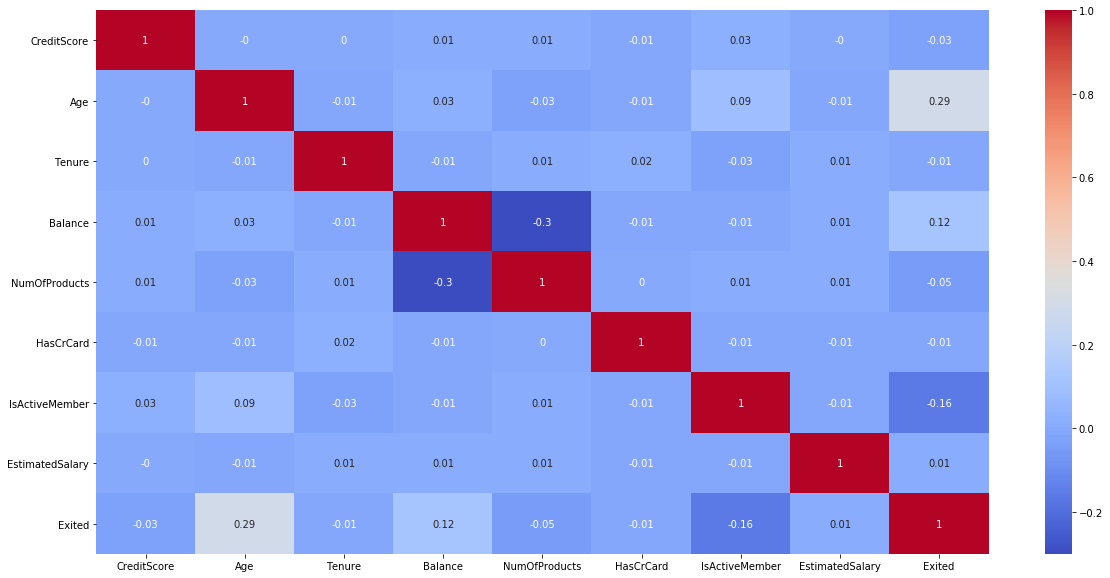

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm')

In [7]:
df.corr()['Exited'].sort_values(ascending = True)

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012635
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

Hasil :
- Korelasi terbalik antara features IsActiveMember, NumOfProducts, CreditScore, Tenure dan HasCrCard dengan Exited
- Korelasi searah antara features EstimatedSalary, Balance dan Age dengan Exited

## Data Preprocessing

In [8]:
# float => int

import math
for i in range(len(df)):
    df.Balance[i] = math.ceil(df.Balance[i])
    df.EstimatedSalary[i] = math.ceil(df.EstimatedSalary[i])
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [9]:
# One Hot Encoding 'Geography' feature

df = pd.get_dummies(data=df, columns=['Geography'])
df = pd.get_dummies(data=df, columns=['Gender'])

In [10]:
df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9995,771,39,5,0,2,1,0,96271,0,1,0,0,0,1
9996,516,35,10,57370,1,1,1,101700,0,1,0,0,0,1
9997,709,36,7,0,1,0,1,42086,1,1,0,0,1,0
9998,772,42,3,75076,2,1,0,92889,1,0,1,0,0,1
9999,792,28,4,130143,1,1,0,38191,0,1,0,0,1,0


In [11]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = dataDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,CreditScore,int64,0,0.0,460,"[545, 744]"
1,Age,int64,0,0.0,70,"[28, 68]"
2,Tenure,int64,0,0.0,11,"[4, 0]"
3,Balance,int32,0,0.0,6206,"[104415, 122774]"
4,NumOfProducts,int64,0,0.0,4,"[1, 2]"
5,HasCrCard,int64,0,0.0,2,"[0, 1]"
6,IsActiveMember,int64,0,0.0,2,"[0, 1]"
7,EstimatedSalary,int32,0,0.0,9713,"[107244, 147060]"
8,Exited,int64,0,0.0,2,"[1, 0]"
9,Geography_France,uint8,0,0.0,2,"[1, 0]"


## Feature Selection

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.80, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(8000, 13)
(2000, 13)


In [14]:
print((pd.crosstab(index=df['Exited'], columns='count', normalize=True)*100).round(2))

print('=' *100)
print(df.Exited.value_counts())

# Dataset imbalance

col_0   count
Exited       
0       79.63
1       20.37
0    7963
1    2037
Name: Exited, dtype: int64


## Random Over Sampling

In [15]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
2151,753,57,7,0,1,1,0,159476,1,0,0,0,1,1
8392,739,32,3,102129,1,1,0,63982,0,1,0,0,1,1
5006,755,37,0,113866,2,1,1,117397,0,1,0,1,0,0
4117,561,37,5,0,2,1,0,83094,1,0,0,0,1,0
7182,692,49,6,110541,2,0,1,107473,0,1,0,0,1,0


In [16]:
df_train['Exited'].value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [17]:
non_churn = df_train[df_train['Exited'] == 0] ## Kelas Majority
churn = df_train[df_train['Exited'] == 1] ## Kelas Minority

In [18]:
from sklearn.utils import resample

churn_oversample = resample(churn, ## Kelas Minority
                           replace=True,
                           n_samples = len(non_churn), ## Jumlah dari Kelas Majority
                           random_state = 42)
df_OverSampled = pd.concat([non_churn, churn_oversample])
df_OverSampled['Exited'].value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [19]:
X_train = df_OverSampled.drop(columns='Exited')
y_train = df_OverSampled['Exited']

# Machine Learning

- Prediksi churn adalah masalah umum di berbagai industri. Masalah dengan prediksi churn telah dibahas dalam industri :
    - Telekomunikasi (Huang & Kechadi (2013), Huang et al. (2012), Idris et al. (2012), Dierkes et al. (2011), Kim et al. (2014), Keramati et al. (2014), Verbeke et al. (2014)), 
    - Perbankan (Nie et al. (2011), Xie et al. (2009), zden Gr Ali & Artrk (2014), Glady et al. (2009 )), 
    - Asuransi (Risselada et al. (2010)), 
    - Customer Relationship Management (Farquad et al. (2014), Ballings & Van Den Poel (2012), Kim & Moon (2012), Lee et al. (2011), Burez & den Poel (2007)), 
    - Sektor energi (Moeyersoms & Martens (2015)), 
    - Sumber daya manusia (SDM) (Saradhi & Palshikar (2011)), 
    - Social network (Ngonmang et al. (2012)) dan 
    - Game (Runge et al. (2014), Hadiji et al. (2014), Borbora & Srivastava (2012) dan Castro & de Sales Guerra Tsuzuki (2015)).


- Prediksi churn pada penelitian terdahulu menggunakan model :
    - Beberapa algoritma pembelajaran mesin digunakan untuk masalah klasifikasi biner prediksi churn:  
        Logistic Regression, Decision Tree, Random Forest, Gaussian Naive Bayes dan Gradient Boosting. Milošević et al. (2017).
    - Naz et al. (2018) Decision Tree, SVM and Ensemble Model
    - Logistic Regression adalah yang paling umum, diterapkan pada penelitian Runge et al. (2014), Hadiji et al. (2014), Dror dkk. (2012), Nie et al. (2011), zden Gr Ali & Artrk (2014), Glady et al. (2009), Ballings & Van Den Poel (2012), Lee et al. (2011), Borbora & Srivastava (2012), Risselada et al. (2010), Huang & Kechadi (2013) dan Dierkes et al. (2011), Burez & den Poel (2007).
    - Decision Tree digunakan oleh Runge et al. (2014), Hadiji et al. (2014), Dror dkk. (2012), Nie et al. (2011), zden Gr Ali & Artrk (2014), Glady et al. (2009), Ballings & Van Den Poel (2012), Lee et al. (2011), Coussement & Bock (2013), Risselada et al. (2010), Huang & Kechadi (2013), Keramati et al. (2014). 
    - Pengklasifikasi berbasis kernel, yaitu SVM, diterapkan oleh Dror et al. (2012), Farquad et al. (2014), Moeyersoms & Martens (2015), Borbora & Srivastava (2012), Saradhi & Palshikar (2011) dan Keramati et al. (2014).

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

model_Logreg = LogisticRegression()
model_Logreg.fit(X_train, y_train)
y_pred_Logreg = model_Logreg.predict(X_test)
y_pred_Logreg_train = model_Logreg.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [22]:
precision_Logreg = precision_score(y_test, y_pred_Logreg)
recall_Logreg = recall_score(y_test, y_pred_Logreg)
f1score_Logreg = f1_score(y_test, y_pred_Logreg)
acc_Logreg = accuracy_score(y_test, y_pred_Logreg)

recall_Logreg_train = recall_score(y_train, y_pred_Logreg_train)

print(f"Train Recall Logistic Regression : {recall_Logreg_train}")
print(f"Test recall Score Logistic Regression : {recall_Logreg}")

Train Recall Logistic Regression : 0.6717425431711146
Test recall Score Logistic Regression : 0.6781326781326781


In [23]:
print(classification_report(y_test, y_pred_Logreg))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.65      2000
   macro avg       0.61      0.66      0.59      2000
weighted avg       0.77      0.65      0.68      2000



In [24]:
cm_Logreg = confusion_matrix(y_test, y_pred_Logreg, labels = [1,0])
df_Logreg = pd.DataFrame(data = cm_Logreg, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_Logreg

,Prediksi 1,Prediksi 0
Aktual 1,276,131
Aktual 0,575,1018


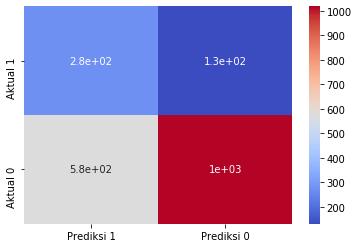

In [25]:
sns.heatmap(df_Logreg, annot = True, cmap='coolwarm')

## Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_RF.predict(X_test)
y_pred_RF_train = model_RF.predict(X_train)

In [27]:
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1score_RF = f1_score(y_test, y_pred_RF)
acc_RF = accuracy_score(y_test, y_pred_RF)

recall_RF_train = recall_score(y_train, y_pred_RF_train)

print(f"Train Recall Score Random Forest : {recall_RF_train}")
print(f"Test Recall Score Random Forest : {recall_RF}")

Train Recall Score Random Forest : 0.9998430141287284
Test Recall Score Random Forest : 0.5208845208845209


In [28]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.52      0.59       407

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



In [29]:
cm_RF = confusion_matrix(y_test, y_pred_RF, labels = [1,0])
df_RF = pd.DataFrame(data = cm_RF, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_RF

,Prediksi 1,Prediksi 0
Aktual 1,212,195
Aktual 0,98,1495


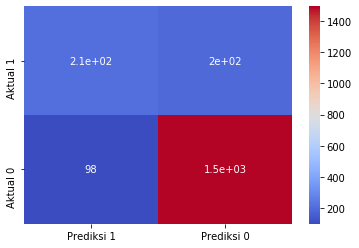

In [30]:
sns.heatmap(df_RF, annot = True, cmap='coolwarm')

## XG Boost

In [31]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
y_pred_XGB_train = model_XGB.predict(X_train)

In [32]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5006,755,37,0,113866,2,1,1,117397,0,1,0,1,0
4117,561,37,5,0,2,1,0,83094,1,0,0,0,1
7182,692,49,6,110541,2,0,1,107473,0,1,0,0,1
3522,659,38,9,0,2,1,1,132810,1,0,0,1,0
741,546,24,8,156326,1,1,1,125382,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,497,29,4,85647,1,0,0,63234,1,0,0,1,0
6538,546,34,4,165364,2,1,1,25745,1,0,0,0,1
6097,575,47,9,107916,2,1,1,63453,0,1,0,0,1
3377,665,37,3,111912,1,1,1,110360,0,1,0,1,0


In [33]:
model_XGB.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
precision_XGB = precision_score(y_test, y_pred_XGB)
recall_XGB = recall_score(y_test, y_pred_XGB)
f1score_XGB = f1_score(y_test, y_pred_XGB)
acc_XGB = accuracy_score(y_test, y_pred_XGB)

recall_XGB_train = recall_score(y_train, y_pred_XGB_train)

print(f"Train Recall Score XG Boost : {recall_XGB_train}")
print(f"Test Recall Score XG Boost : {recall_XGB}")

Train Recall Score XG Boost : 0.7886970172684459
Test Recall Score XG Boost : 0.7616707616707616


In [35]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1593
           1       0.52      0.76      0.62       407

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.81      0.82      2000



In [36]:
cm_XGB = confusion_matrix(y_test, y_pred_XGB, labels = [1,0])
df_XGB = pd.DataFrame(data = cm_XGB, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_XGB

,Prediksi 1,Prediksi 0
Aktual 1,310,97
Aktual 0,291,1302


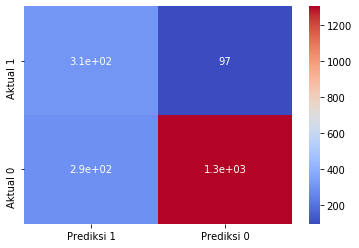

In [37]:
sns.heatmap(df_XGB, annot = True, cmap='coolwarm')

## SVC

In [38]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train, y_train)
y_pred_SVC = model_SVC.predict(X_test)
y_pred_SVC_train = model_SVC.predict(X_train)

In [39]:
precision_SVC = precision_score(y_test, y_pred_SVC)
recall_SVC = recall_score(y_test, y_pred_SVC)
f1score_SVC = f1_score(y_test, y_pred_SVC)
acc_SVC = accuracy_score(y_test, y_pred_SVC)

recall_SVC_train = recall_score(y_train, y_pred_SVC_train)

print(f"Train Recall Score SVC : {recall_SVC_train}")
print(f"Test Recall Score SVC : {recall_SVC}")

Train Recall Score SVC : 0.7499215070643642
Test Recall Score SVC : 0.7371007371007371


In [40]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.85      0.39      0.53      1593
           1       0.24      0.74      0.36       407

    accuracy                           0.46      2000
   macro avg       0.54      0.56      0.45      2000
weighted avg       0.73      0.46      0.50      2000



In [41]:
cm_SVC = confusion_matrix(y_test, y_pred_SVC, labels = [1,0])
df_SVC = pd.DataFrame(data = cm_SVC, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_SVC

,Prediksi 1,Prediksi 0
Aktual 1,300,107
Aktual 0,974,619


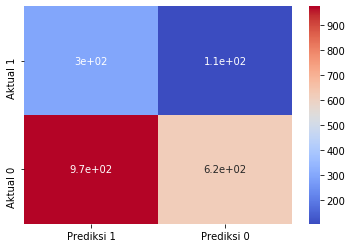

In [42]:
sns.heatmap(df_SVC, annot = True, cmap='coolwarm')

## Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
ModelDT = DecisionTreeClassifier()
ModelDT.fit(X_train, y_train)
y_pred_DT = ModelDT.predict(X_test)
y_pred_DT_train = ModelDT.predict(X_train)

In [44]:
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1score_DT = f1_score(y_test, y_pred_DT)
acc_DT = accuracy_score(y_test, y_pred_DT)

recall_DT_train = recall_score(y_train, y_pred_DT_train)

print(f"Train Recall Score SVC : {recall_DT_train}")
print(f"Test Recall Score SVC : {recall_DT}")

Train Recall Score SVC : 1.0
Test Recall Score SVC : 0.4594594594594595


In [45]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1593
           1       0.48      0.46      0.47       407

    accuracy                           0.79      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.79      0.79      0.79      2000



In [46]:
cm_DT = confusion_matrix(y_test, y_pred_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT

,Prediksi 1,Prediksi 0
Aktual 1,187,220
Aktual 0,199,1394


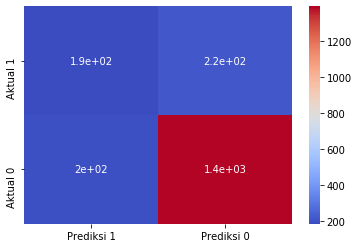

In [47]:
sns.heatmap(df_DT, annot = True, cmap='coolwarm')

## Hasil Base Model

In [48]:
print("Base Model")
result_basemodel = {
    "LogisticReg": [recall_Logreg, recall_Logreg_train],
    "Random Forest" : [recall_RF, recall_RF_train],
    "XG Boost" : [recall_XGB, recall_XGB_train],
    "SVC" : [recall_SVC, recall_SVC_train],
    "DecisionTree": [recall_DT, recall_DT_train] }

pd.DataFrame(data = result_basemodel, index = ['Recall Test', 'Recall Train'])

Base Model


,LogisticReg,Random Forest,XG Boost,SVC,DecisionTree
Recall Test,0.678133,0.520885,0.761671,0.737101,0.459459
Recall Train,0.671743,0.999843,0.788697,0.749922,1.000000


# Hyperparameter Tuning

## Logistic Regression Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
logreg_tuned = LogisticRegression()
param_logreg = {'C' : [1, 0.5, 0.1, 0.05],
               'penalty' :['l2','l1', 'elasticnet', 'none'],
                'class_weight' : [dict, 'balanced'],
               'max_iter' : [10, 100, 500]}


model_logreg_tuned = GridSearchCV(estimator = logreg_tuned, param_grid = param_logreg, 
                                  cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')
model_logreg_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   14.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 0.05],
                         'class_weight': [<class 'dict'>, 'balanced'],
                         'max_iter': [10, 100, 500],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall',

In [51]:
model_logreg_tuned.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
logreg_tuned_ = model_logreg_tuned.best_estimator_
y_pred_logreg_tuned = logreg_tuned_.predict(X_test)
y_pred_logreg_train_tuned = logreg_tuned_.predict(X_train)

precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
f1score_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)

recall_logreg_tuned_train = recall_score(y_train, y_pred_logreg_train_tuned)

print(f"Train Recall LogReg Tuned : {recall_logreg_tuned_train}")
print(f"Test Recall LogReg Tuned : {recall_logreg_tuned}")


Train Recall LogReg Tuned : 0.6957613814756672
Test Recall LogReg Tuned : 0.683046683046683


In [53]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.85      0.44      0.58      1593
           1       0.24      0.68      0.35       407

    accuracy                           0.49      2000
   macro avg       0.54      0.56      0.47      2000
weighted avg       0.72      0.49      0.53      2000



In [54]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_tuned

,Prediksi 1,Prediksi 0
Aktual 1,278,129
Aktual 0,888,705


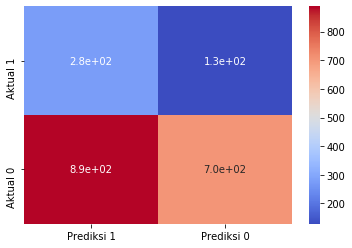

In [55]:
sns.heatmap(df_logreg_tuned, annot = True, cmap='coolwarm')

## Random Forest Tuning

In [99]:
RF_tuned = RandomForestClassifier()
param_RF = {'n_estimators': [100, 500],
            'criterion' : ['gini', 'entropy'],
            'min_samples_split' : [2, 5, 25],
            'min_samples_leaf' : [1, 2, 10]}

model_RF_tuned = GridSearchCV(estimator = RF_tuned, param_grid = param_RF, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_RF_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [100]:
model_RF_tuned.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
RF_tuned_ = model_RF_tuned.best_estimator_
y_pred_RF_tuned = RF_tuned_.predict(X_test)
y_pred_RF_train_tuned = RF_tuned_.predict(X_train)

precision_RF_tuned = precision_score(y_test, y_pred_RF_tuned)
recall_RF_tuned = recall_score(y_test, y_pred_RF_tuned)
acc_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
f1score_RF_tuned = f1_score(y_test, y_pred_RF_tuned)

recall_RF_tuned_train = recall_score(y_train, y_pred_RF_train_tuned)

print(f"Train Recall RF Tuned : {recall_RF_tuned_train}")
print(f"Test Recall RF Tuned : {recall_RF_tuned}")


Train Recall RF Tuned : 1.0
Test Recall RF Tuned : 0.5307125307125307


In [102]:
print(classification_report(y_test, y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.53      0.59       407

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [103]:
cm_RF_tuned = confusion_matrix(y_test, y_pred_RF_tuned, labels = [1,0])
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_RF_tuned

,Prediksi 1,Prediksi 0
Aktual 1,216,191
Aktual 0,106,1487


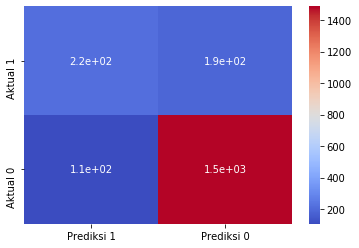

In [104]:
sns.heatmap(df_RF_tuned, annot = True, cmap='coolwarm')

## Decision Tree Tuning

In [62]:
DT_tuned = DecisionTreeClassifier()
param_DT = {"max_depth": [1, 2, 3, 4, None],
            "criterion": ["gini", "entropy"] 
           }

model_DT_tuned = GridSearchCV(estimator = DT_tuned, param_grid = param_DT, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_DT_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [63]:
model_DT_tuned.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
DT_tuned_ = model_DT_tuned.best_estimator_
y_pred_DT_tuned = DT_tuned_.predict(X_test)
y_pred_DT_train_tuned = DT_tuned_.predict(X_train)

precision_DT_tuned = precision_score(y_test, y_pred_DT_tuned)
recall_DT_tuned = recall_score(y_test, y_pred_DT_tuned)
acc_DT_tuned = accuracy_score(y_test, y_pred_DT_tuned)
f1score_DT_tuned = f1_score(y_test, y_pred_DT_tuned)

recall_DT_tuned_train = recall_score(y_train, y_pred_DT_train_tuned)

print(f"Train Recall DT Tuned : {recall_DT_tuned_train}")
print(f"Test Recall DT Tuned : {recall_DT_tuned}")


Train Recall DT Tuned : 1.0
Test Recall DT Tuned : 0.5085995085995086


In [65]:
print(classification_report(y_test, y_pred_DT_tuned))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.50      0.51      0.50       407

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [66]:
cm_DT_tuned = confusion_matrix(y_test, y_pred_DT_tuned , labels = [1,0])
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT_tuned

,Prediksi 1,Prediksi 0
Aktual 1,207,200
Aktual 0,210,1383


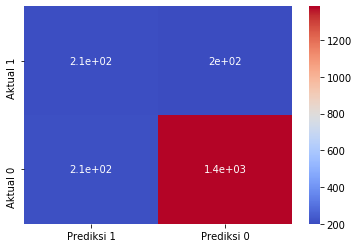

In [67]:
sns.heatmap(df_DT_tuned, annot = True, cmap='coolwarm')

## XG Boost Tuning

In [68]:
XGB_tuned = XGBClassifier()
param_XGB ={'max_depth': [1, 7, 1.5, 6] ,
             'n_estimators': [100, 150, 500], 
             'gamma': [0, 2, 0.5, 1]}

model_XGB_tuned = GridSearchCV(estimator = XGB_tuned, param_grid = param_XGB, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_XGB_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 2, 0.5, 1], 'max_depth': [1, 7, 1.5, 6],
                         'n_estimators': [100, 150, 500]},
             pre_dispatch='2*n_jobs', ref

In [69]:
XGB_tuned_ = model_XGB_tuned.best_estimator_
y_pred_XGB_tuned = XGB_tuned_.predict(X_test)
y_pred_XGB_train_tuned = XGB_tuned_.predict(X_train)

precision_XGB_tuned = precision_score(y_test, y_pred_XGB_tuned)
recall_XGB_tuned = recall_score(y_test, y_pred_XGB_tuned)
acc_XGB_tuned = accuracy_score(y_test, y_pred_XGB_tuned)
f1score_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)

recall_XGB_tuned_train = recall_score(y_train, y_pred_XGB_train_tuned)

print(f"Train Recall XGB Tuned : {recall_XGB_tuned_train}")
print(f"Test Recall XGB Tuned : {recall_XGB_tuned}")


Train Recall XGB Tuned : 0.9989010989010989
Test Recall XGB Tuned : 0.5331695331695332


In [70]:
print(classification_report(y_test, y_pred_XGB_tuned))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1593
           1       0.60      0.53      0.56       407

    accuracy                           0.83      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.83      0.83      0.83      2000



In [71]:
cm_XGB_tuned = confusion_matrix(y_test, y_pred_XGB_tuned , labels = [1,0])
df_XGB_tuned = pd.DataFrame(data = cm_XGB_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_XGB_tuned

,Prediksi 1,Prediksi 0
Aktual 1,217,190
Aktual 0,146,1447


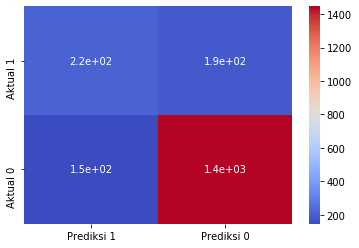

In [72]:
sns.heatmap(df_XGB_tuned, annot = True, cmap='coolwarm')

## XGB Tuning (1)

In [73]:
XGB_tuned1 = XGBClassifier()
param_XGB1 ={'max_depth': [1, 2, 3, 4],
             'n_estimators': [100, 150], 
             'gamma': [0, 0.01 ,0.001, 0.05, 0.5, 1]}

model_XGB_tuned1 = GridSearchCV(estimator = XGB_tuned1, param_grid = param_XGB1, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_XGB_tuned1.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 0.01, 0.001, 0.05, 0.5, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150]},
       

In [74]:
XGB_tuned_1 = model_XGB_tuned1.best_estimator_
y_pred_XGB_tuned1 = model_XGB_tuned1.predict(X_test)
y_pred_XGB_train_tuned1 = model_XGB_tuned1.predict(X_train)

precision_XGB_tuned1 = precision_score(y_test, y_pred_XGB_tuned1)
recall_XGB_tuned1 = recall_score(y_test, y_pred_XGB_tuned1)
acc_XGB_tuned1 = accuracy_score(y_test, y_pred_XGB_tuned1)
f1score_XGB_tuned1 = f1_score(y_test, y_pred_XGB_tuned1)

recall_XGB_tuned_train1 = recall_score(y_train, y_pred_XGB_train_tuned1)

print(f"Train Recall XGB Tuned : {recall_XGB_tuned_train1}")
print(f"Test Recall XGB Tuned : {recall_XGB_tuned1}")


Train Recall XGB Tuned : 0.8307692307692308
Test Recall XGB Tuned : 0.7371007371007371


In [75]:
print(classification_report(y_test, y_pred_XGB_tuned1))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.52      0.74      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [76]:
cm_XGB_tuned1 = confusion_matrix(y_test, y_pred_XGB_tuned1 , labels = [1,0])
df_XGB_tuned1 = pd.DataFrame(data = cm_XGB_tuned1, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_XGB_tuned1

,Prediksi 1,Prediksi 0
Aktual 1,300,107
Aktual 0,279,1314


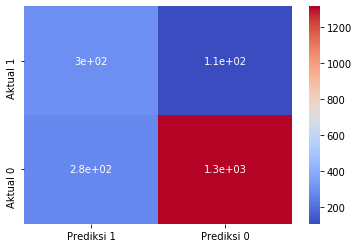

In [77]:
sns.heatmap(df_XGB_tuned1, annot = True, cmap='coolwarm')

## SVC Tuning

In [78]:
SVC_tuned = SVC()
param_SVC ={'C' : [0.005, 0.001, 0.05, 0.01, 0.5, 1],
            'max_iter': [2000, 3000, 4000],
            'kernel': ['rbf', 'sigmoid']}

model_SVC_tuned = GridSearchCV(estimator = SVC_tuned, param_grid = param_SVC, cv = 3, 
                          n_jobs = -1 , verbose = 1, scoring = 'recall')

model_SVC_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.005, 0.001, 0.05, 0.01, 0.5, 1],
                         'kernel': ['rbf', 'sigmoid'],
                         'max_iter': [2000, 3000, 4000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [79]:
model_SVC_tuned.best_estimator_

SVC(C=0.005, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=2000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
SVC_tuned_ = model_SVC_tuned.best_estimator_
y_pred_SVC_tuned = SVC_tuned_.predict(X_test)
y_pred_SVC_train_tuned = SVC_tuned_.predict(X_train)

precision_SVC_tuned = precision_score(y_test, y_pred_SVC_tuned)
recall_SVC_tuned = recall_score(y_test, y_pred_SVC_tuned)
acc_SVC_tuned = accuracy_score(y_test, y_pred_SVC_tuned)
f1score_SVC_tuned = f1_score(y_test, y_pred_SVC_tuned)

recall_SVC_tuned_train = recall_score(y_train, y_pred_SVC_train_tuned)

print(f"Train Recall SVC Tuned : {recall_SVC_tuned_train}")
print(f"Test Recall SVC Tuned : {recall_SVC_tuned}")


Train Recall SVC Tuned : 0.9084772370486656
Test Recall SVC Tuned : 0.8845208845208845


In [81]:
print(classification_report(y_test, y_pred_SVC_tuned))

              precision    recall  f1-score   support

           0       0.80      0.12      0.20      1593
           1       0.20      0.88      0.33       407

    accuracy                           0.27      2000
   macro avg       0.50      0.50      0.27      2000
weighted avg       0.68      0.27      0.23      2000



In [82]:
cm_SVC_tuned = confusion_matrix(y_test, y_pred_SVC_tuned , labels = [1,0])
df_SVC_tuned = pd.DataFrame(data = cm_SVC_tuned, index = ['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_SVC_tuned

,Prediksi 1,Prediksi 0
Aktual 1,360,47
Aktual 0,1408,185


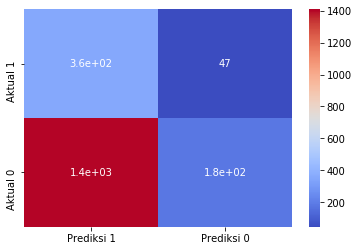

In [83]:
sns.heatmap(df_SVC_tuned, annot = True, cmap='coolwarm')

# Hasil Tuning

In [84]:
print("Tuned")
result_tuned = {
    "LogisticReg Tuned": [recall_logreg_tuned, recall_logreg_tuned_train],
    "Random Forest Tuned" : [recall_RF_tuned, recall_RF_tuned_train],
    "DecisionTree Tuned": [recall_DT_tuned, recall_DT_tuned_train],
    "XG Boost Tuned" : [recall_XGB_tuned, recall_XGB_tuned_train],
    "XG Boost Tuned 1" : [recall_XGB_tuned1, recall_XGB_tuned_train1],
    "SVC Tuned" : [recall_SVC_tuned, recall_SVC_tuned_train]}
 
pd.DataFrame(data = result_tuned, index = ['Recall Test', 'Recall Train'])

Tuned


,LogisticReg Tuned,Random Forest Tuned,DecisionTree Tuned,XG Boost Tuned,XG Boost Tuned 1,SVC Tuned
Recall Test,0.683047,0.513514,0.5086,0.533170,0.737101,0.884521
Recall Train,0.695761,1.000000,1.0000,0.998901,0.830769,0.908477


# Hasil Seluruh Model

In [85]:
print("Base Model and After Tuning")
result_ALL = {
    "LogisticReg": [recall_Logreg, recall_Logreg_train],
    "Random Forest" : [recall_RF, recall_RF_train],
    "XG Boost" : [recall_XGB, recall_XGB_train],
    "SVC" : [recall_SVC, recall_SVC_train],
    "Decision Tree": [recall_DT, recall_DT_train],
    "LogisticReg Tuned": [recall_logreg_tuned, recall_logreg_tuned_train],
    "Random Forest Tuned" : [recall_RF_tuned, recall_RF_tuned_train],
    "Decision Tree Tuned": [recall_DT_tuned, recall_DT_tuned_train],
    "XG Boost Tuned" : [recall_XGB_tuned, recall_XGB_tuned_train],
    "XG Boost Tuned 1" : [recall_XGB_tuned1, recall_XGB_tuned_train1],
    "SVC Tuned" : [recall_SVC_tuned, recall_SVC_tuned_train]}

pd.DataFrame(data = result_ALL, index = ['Recall Test', 'Recall Train']).T

Base Model and After Tuning


,Recall Test,Recall Train
LogisticReg,0.678133,0.671743
Random Forest,0.520885,0.999843
XG Boost,0.761671,0.788697
SVC,0.737101,0.749922
Decision Tree,0.459459,1.000000
LogisticReg Tuned,0.683047,0.695761
Random Forest Tuned,0.513514,1.000000
Decision Tree Tuned,0.508600,1.000000
XG Boost Tuned,0.533170,0.998901
XG Boost Tuned 1,0.737101,0.830769


# Best Model

- Dari 11 model yang diuji coba, Model SVC Tuned memiliki hasil Recall terbaik
    - Test 0.88
    - Train 0.90

## Testing

In [86]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5006,755,37,0,113866,2,1,1,117397,0,1,0,1,0
4117,561,37,5,0,2,1,0,83094,1,0,0,0,1
7182,692,49,6,110541,2,0,1,107473,0,1,0,0,1
3522,659,38,9,0,2,1,1,132810,1,0,0,1,0
741,546,24,8,156326,1,1,1,125382,1,0,0,0,1


## Testing dengan SVC

In [87]:

user7 = [480, 30, 2, 10000, 1, 1, 1, 5000, 1, 0, 0, 0, 1]
model_SVC.predict([user7])[0]

0

## Testing dengan XGB

In [88]:
user5 = {'user' : [600, 30, 1, 0, 1, 0, 1, 5000, 0, 0, 1, 1, 0]}

In [89]:
user = pd.DataFrame(data=user5).T

In [90]:
user.columns = X_train.columns

In [91]:
user

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
user,600,30,1,0,1,0,1,5000,0,0,1,1,0


In [92]:
model_XGB.predict(user)[0]

0

# Testing dengan Model SVC Tuned

In [93]:
user8 = [480, 30, 2, 10000, 1, 1, 1, 5000, 1, 0, 0, 0, 1]
model_SVC_tuned.predict([user8])[0]

0

## Export Model

In [94]:
import joblib
joblib.dump(model_logreg_tuned,'bank-model_logreg_tuned')

['bank-model_logreg_tuned']

In [95]:
import joblib
joblib.dump(model_XGB,'bank-model_model_XGB')

['bank-model_model_XGB']

In [96]:
import joblib
joblib.dump(model_SVC_tuned,'bank-model-model_SVC_tuned')

['bank-model-model_SVC_tuned']

# Kesimpulan

- Pada data Bank Churn ini, saya memilih 10 features dengan Target Exited dan membagi ukuran data menjadi 80% train dan 20% test.
- Karena dataset termasuk `IMBALANCE` maka saya melakukan `Random Over Sampling` terhadap Kelas Minority 'Churn'. 
    - Random Over Sampling merupakan Data pada Kelas Minority akan diduplikasi secara random hingga jumlahnya sama dengan kelas Majority.
    
- Saya melakukan modelling dengan menggunakan 5 model :
    - Logistic Regression
    - Random Forest
    - XG Boost
    - SVC (Support Vector Classifier)
    - Decision Tree

- Dari 5 model diatas, kemudian saya lakukan Hyperparameter Tuning setiap model untuk optimasi hasil model.
- Model akan berfokus pada `Recall dari kelas 1`.
    - Recall adalah rasio real churners yang diidentifikasi dengan benar.
    - Yang akan dihindari adalah Error (False Negative) ==> Aktual Churn tetapi diprediksi Non-Churn.
    
- Dari keseluruhan hasil, terdapat 3 hasil terbaik, yaitu :
    - Model SVC Tuned = Recall Test 0.884
    - Model XG Boost = Recall Test 0.7616
    - Model SVC Base = Recall Test 0.7371
   
-

# Rekomendasi

1. Bank diharapkan dapat menambah variabel lain.
     - Untuk prediksi di masa depan, Bank diharapkan dapat menambah variable lain yang relevan (misal: variabel demografis nasabah tambahan seperti status pernikahan dan pendidikan, dan juga Kepuasan nasabah ataupun Brand Image perusahaan)
2. Penggunaan model-model lain selain yang telah digunakan dan juga melakukan penyesuaian terhadap parameter di setiap model.